# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import time
import random
import requests
import json
from citipy import citipy
from scipy import stats 
from scipy.stats import linregress



weather_api_key='d7289453551854680c119fe040dffb5f'
# Access maps with unique API key
#gmaps.configure(api_key=gkey)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


## Generate Cities List

In [2]:
### Perform API Calls
#* Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
city_list=[]
max_city = 1200

record = 1 
set1 = 1

print('Beginning Data Retrieval')
print('-----------------------------')
for x in range(max_city):
    lon = random.uniform(180,-180)
    lat = random.uniform(90,-90)
    city = citipy.nearest_city(lat,lon)
    city_name = city.city_name
    #get the weather info here
    if city_name != "404":
        if city_name not in city_list:
            try:
                response = requests.get(query_url + city_name).json()
                country_code = response['sys']['country']
                lat2 = response['coord']['lat']
                lon2 = response['coord']['lon']
                temp = response['main']['temp']
                hum = response['main']['humidity']
                date = response['dt']
                #humidity calc
                cloud = response['clouds']['all']
                wind = response['wind']['speed']
                city_list = city_list+[[city_name,country_code,lat2,lon2,temp,hum,cloud,wind,date]]
                print(f'Processing Record {record} of Set {set1} | {city_name}')
                record+=1
                if record > 50:
                    record = 0 
                    set1+=1
            except:
                print(f"City not found. Skipping... ")
    else:
        print('Name not valid...')
print('-----------------------------')        
print('Data Retrieval Complete')
print('-----------------------------')
 
citydf = pd.DataFrame (city_list)

Beginning Data Retrieval
-----------------------------
City not found. Skipping... 
Processing Record 1 of Set 1 | makasar
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | garowe
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | mahe
Processing Record 7 of Set 1 | ribeira grande
City not found. Skipping... 
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | rupert
Processing Record 10 of Set 1 | sibolga
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | coihaique
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | yumen
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | hambantota
Processing Record 22 of Set 1 

Processing Record 31 of Set 4 | xian
Processing Record 32 of Set 4 | kattivakkam
City not found. Skipping... 
City not found. Skipping... 
Processing Record 33 of Set 4 | tiksi
Processing Record 34 of Set 4 | barrow
City not found. Skipping... 
Processing Record 35 of Set 4 | muriwai beach
Processing Record 36 of Set 4 | upernavik
Processing Record 37 of Set 4 | dubbo
Processing Record 38 of Set 4 | bitung
Processing Record 39 of Set 4 | olafsvik
Processing Record 40 of Set 4 | lavrentiya
Processing Record 41 of Set 4 | victoria
Processing Record 42 of Set 4 | hilo
Processing Record 43 of Set 4 | alice springs
Processing Record 44 of Set 4 | kalmunai
Processing Record 45 of Set 4 | domoni
City not found. Skipping... 
Processing Record 46 of Set 4 | san miguel
City not found. Skipping... 
Processing Record 47 of Set 4 | mataura
Processing Record 48 of Set 4 | kuching
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | dikson
Processing Record 0 of Set 5 | mataura


Processing Record 21 of Set 8 | saldanha
Processing Record 22 of Set 8 | loiza
Processing Record 23 of Set 8 | zhangye
Processing Record 24 of Set 8 | padang
Processing Record 25 of Set 8 | albany
Processing Record 26 of Set 8 | puerto ayora
Processing Record 27 of Set 8 | atuona
Processing Record 28 of Set 8 | avarua
Processing Record 29 of Set 8 | san carlos de bariloche
Processing Record 30 of Set 8 | hilo
Processing Record 31 of Set 8 | pevek
Processing Record 32 of Set 8 | severo-kurilsk
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | port elizabeth
Processing Record 35 of Set 8 | qingdao
Processing Record 36 of Set 8 | new norfolk
Processing Record 37 of Set 8 | hilo
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | rikitea
Processing Record 40 of Set 8 | olkhovka
Processing Record 41 of Set 8 | bluff
Processing Record 42 of Set 8 | nikolskoye
Processing Record 43 of Set 8 | narsaq
Processing Record 44 of Set 8 | mataura
Processing 

Processing Record 10 of Set 12 | zanjan
Processing Record 11 of Set 12 | kharitonovo
Processing Record 12 of Set 12 | jalu
Processing Record 13 of Set 12 | nelson bay
Processing Record 14 of Set 12 | atuona
Processing Record 15 of Set 12 | makakilo city
Processing Record 16 of Set 12 | longonjo
Processing Record 17 of Set 12 | albany
City not found. Skipping... 
Processing Record 18 of Set 12 | quebec
Processing Record 19 of Set 12 | aksarka
Processing Record 20 of Set 12 | esso
Processing Record 21 of Set 12 | punta arenas
Processing Record 22 of Set 12 | bengkulu
Processing Record 23 of Set 12 | lebu
City not found. Skipping... 
Processing Record 24 of Set 12 | saint-philippe
Processing Record 25 of Set 12 | airai
Processing Record 26 of Set 12 | honiara
Processing Record 27 of Set 12 | port lincoln
Processing Record 28 of Set 12 | moses lake
Processing Record 29 of Set 12 | georgetown
Processing Record 30 of Set 12 | arraial do cabo
Processing Record 31 of Set 12 | albany
Processing

Processing Record 37 of Set 15 | rafaela
Processing Record 38 of Set 15 | vaini
Processing Record 39 of Set 15 | garowe
Processing Record 40 of Set 15 | ushuaia
Processing Record 41 of Set 15 | lerwick
City not found. Skipping... 
Processing Record 42 of Set 15 | kaspiyskiy
Processing Record 43 of Set 15 | cosala
Processing Record 44 of Set 15 | dikson
City not found. Skipping... 
Processing Record 45 of Set 15 | burnie
Processing Record 46 of Set 15 | le port
Processing Record 47 of Set 15 | rikitea
Processing Record 48 of Set 15 | pionerskiy
Processing Record 49 of Set 15 | vestmanna
Processing Record 50 of Set 15 | saskylakh
Processing Record 0 of Set 16 | mataura
Processing Record 1 of Set 16 | peringat
Processing Record 2 of Set 16 | banda aceh
Processing Record 3 of Set 16 | vaini
Processing Record 4 of Set 16 | mar del plata
Processing Record 5 of Set 16 | touros
City not found. Skipping... 
Processing Record 6 of Set 16 | tuktoyaktuk
Processing Record 7 of Set 16 | airai
Proces

Processing Record 16 of Set 19 | talnakh
Processing Record 17 of Set 19 | mataura
Processing Record 18 of Set 19 | cape town
Processing Record 19 of Set 19 | ostersund
Processing Record 20 of Set 19 | jizan
Processing Record 21 of Set 19 | vuktyl
Processing Record 22 of Set 19 | busselton
Processing Record 23 of Set 19 | svetlogorsk
Processing Record 24 of Set 19 | puerto ayora
Processing Record 25 of Set 19 | batesville
Processing Record 26 of Set 19 | ushuaia
Processing Record 27 of Set 19 | tautira
Processing Record 28 of Set 19 | riyadh
Processing Record 29 of Set 19 | vaini
City not found. Skipping... 
Processing Record 30 of Set 19 | mataura
Processing Record 31 of Set 19 | chokurdakh
Processing Record 32 of Set 19 | butaritari
Processing Record 33 of Set 19 | port hardy
Processing Record 34 of Set 19 | pathalgaon
Processing Record 35 of Set 19 | ushuaia
Processing Record 36 of Set 19 | koungou
Processing Record 37 of Set 19 | yarega
Processing Record 38 of Set 19 | mar del plata

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#api calls in for loop above
citydf = pd.DataFrame (city_list)
citydf.columns =['City','Country Code','Latitude','Longitude','Temperature','Humidity','Clouds','Wind','Date']
citydf.to_csv('Resources/WeatherPyData.csv')
citydf



,City,Country Code,Latitude,Longitude,Temperature,Humidity,Clouds,Wind,Date
0,makasar,ID,-5.14,119.42,75.20,100,40,2.24,1605978888
1,rikitea,PF,-23.12,-134.97,72.97,63,3,3.76,1605978568
2,garowe,SO,8.41,48.48,82.08,27,93,12.86,1605979119
3,east london,ZA,-33.02,27.91,78.80,69,0,4.70,1605978546
4,hermanus,ZA,-34.42,19.23,64.00,83,83,4.00,1605978561
...,...,...,...,...,...,...,...,...,...
1089,margate,GB,51.38,1.39,53.01,72,96,1.99,1605979196
1090,amboasary,MG,-25.03,46.38,71.60,73,75,11.41,1605979326
1091,nogliki,RU,51.83,143.17,23.90,96,100,12.33,1605979326
1092,punta cardon,VE,11.66,-70.22,85.17,69,93,19.10,1605979326


In [5]:
#make a new dataframe with count, mean, std, min, 25%, 50%, 75%, max

In [6]:
weird_df = citydf[['Latitude','Longitude','Temperature','Humidity','Clouds','Wind','Date']]

        
weird_df = weird_df.append(weird_df.agg(['count','mean','std','min','max']))
count = weird_df['Latitude'].count()
count = count-5
count


1094

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humid_list = []

for i in range(len(citydf)):
    if citydf.loc[i,'Humidity'] >= 95:
        humid_list.append(i)
humid_list


[0,
 28,
 31,
 34,
 37,
 56,
 63,
 79,
 100,
 102,
 104,
 139,
 142,
 160,
 168,
 176,
 202,
 204,
 245,
 248,
 251,
 255,
 273,
 274,
 279,
 286,
 306,
 322,
 329,
 330,
 335,
 346,
 348,
 374,
 384,
 387,
 422,
 423,
 440,
 461,
 469,
 475,
 476,
 546,
 560,
 564,
 571,
 579,
 585,
 586,
 594,
 613,
 629,
 649,
 665,
 687,
 693,
 695,
 723,
 740,
 748,
 755,
 757,
 771,
 778,
 781,
 782,
 791,
 794,
 802,
 826,
 832,
 865,
 875,
 881,
 902,
 903,
 909,
 910,
 931,
 938,
 940,
 954,
 968,
 1000,
 1002,
 1004,
 1052,
 1071,
 1078,
 1080,
 1091]

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

In [9]:
clean_city_data = citydf
index_names = clean_city_data[clean_city_data['Humidity']>99].index
clean_city_data.drop(index_names, inplace = True)
clean_city_data

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Clouds,Wind,Date
1,rikitea,PF,-23.12,-134.97,72.97,63,3,3.76,1605978568
2,garowe,SO,8.41,48.48,82.08,27,93,12.86,1605979119
3,east london,ZA,-33.02,27.91,78.80,69,0,4.70,1605978546
4,hermanus,ZA,-34.42,19.23,64.00,83,83,4.00,1605978561
5,mahe,IN,11.70,75.53,77.00,88,20,3.36,1605979120
...,...,...,...,...,...,...,...,...,...
1089,margate,GB,51.38,1.39,53.01,72,96,1.99,1605979196
1090,amboasary,MG,-25.03,46.38,71.60,73,75,11.41,1605979326
1091,nogliki,RU,51.83,143.17,23.90,96,100,12.33,1605979326
1092,punta cardon,VE,11.66,-70.22,85.17,69,93,19.10,1605979326


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

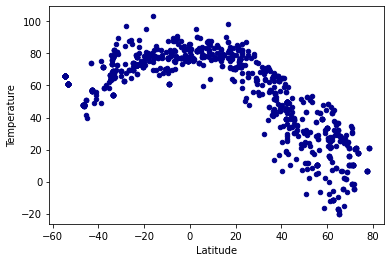

In [10]:
ax1 = clean_city_data.plot.scatter(x='Latitude',
                      y='Temperature',
                      c='DarkBlue')

## Latitude vs. Humidity Plot

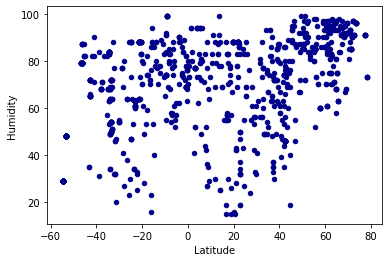

In [11]:
ax1 = clean_city_data.plot.scatter(x='Latitude',
                      y='Humidity',
                      c='DarkBlue')

## Latitude vs. Cloudiness Plot

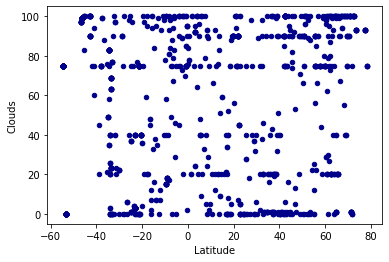

In [12]:
ax1 = clean_city_data.plot.scatter(x='Latitude',
                      y='Clouds',
                      c='DarkBlue')

## Latitude vs. Wind Speed Plot

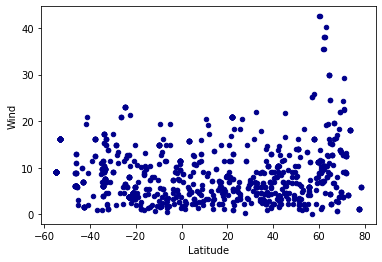

In [13]:
ax1 = clean_city_data.plot.scatter(x='Latitude',
                      y='Wind',
                      c='DarkBlue')


## Linear Regression

In [14]:
#making new Dfs for NH and SH
index_names = clean_city_data[clean_city_data['Latitude']>0].index
new_southdf = clean_city_data.drop(index_names, inplace = False)


index_names = clean_city_data[clean_city_data['Latitude']<0].index
new_northdf = clean_city_data.drop(index_names, inplace = False)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7732277386891285


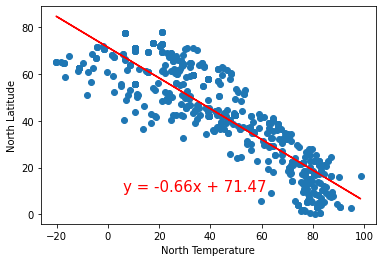

In [15]:
x_values = new_northdf['Temperature']
y_values = new_northdf['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('North Temperature')
plt.ylabel('North Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

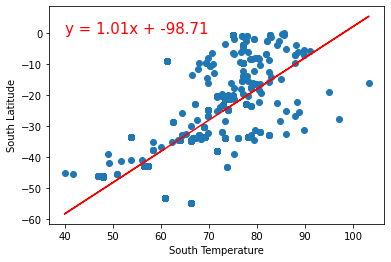

The r-value is: 1.0084083518972218


In [25]:
x_values2 = new_southdf['Temperature']
y_values2 = new_southdf['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq,(40,0),fontsize=15,color="red")
plt.xlabel('South Temperature')
plt.ylabel('South Latitude')
plt.show()

print(f'The r-value is: {slope}')



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13625495964095446


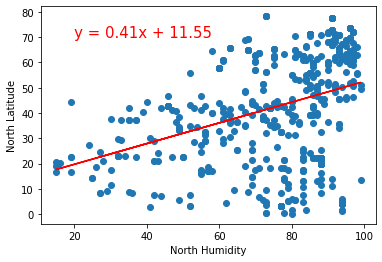

In [27]:
x_values = new_northdf['Humidity']
y_values = new_northdf['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,70),fontsize=15,color="red")
plt.xlabel('North Humidity')
plt.ylabel('North Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19634029315140328


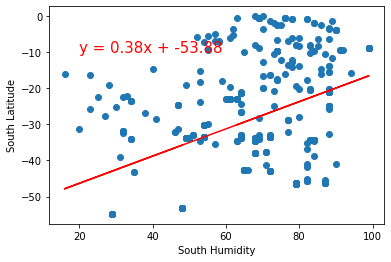

In [30]:
x_values = new_southdf['Humidity']
y_values = new_southdf['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('South Humidity')
plt.ylabel('South Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02994641566247862


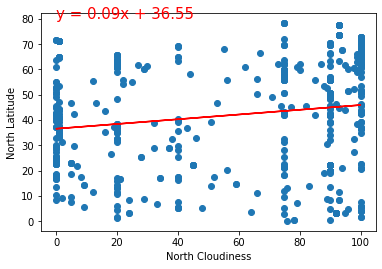

In [31]:
x_values = new_northdf['Clouds']
y_values = new_northdf['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,80),fontsize=15,color="red")
plt.xlabel('North Cloudiness')
plt.ylabel('North Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00437615043113181


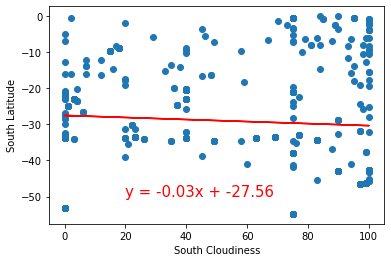

In [20]:
x_values = new_southdf['Clouds']
y_values = new_southdf['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('South Cloudiness')
plt.ylabel('South Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03245417346014281


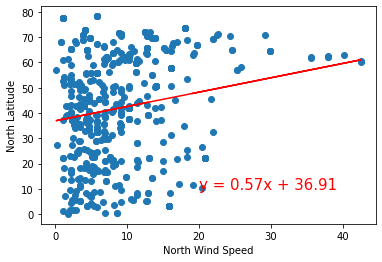

In [21]:
x_values = new_northdf['Wind']
y_values = new_northdf['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('North Wind Speed')
plt.ylabel('North Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05384735389080713


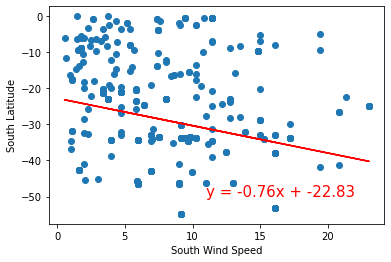

In [32]:
x_values = new_southdf['Wind']
y_values = new_southdf['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(11,-50),fontsize=15,color="red")
plt.xlabel('South Wind Speed')
plt.ylabel('South Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()